In [10]:
import pandas as pd

df = pd.read_csv('weather1.csv', delimiter=';', encoding='utf-8', usecols=['Местное время в Перми', 'T', 'P', 'U', 'Ff', 'N', 'H', 'VV'])
df.head(10)

,Местное время в Перми,T,P,U,Ff,N,H,VV
0,31.12.2021 23:00,-9.8,762.5,83,3,100%.,600-1000,4.0
1,31.12.2021 20:00,-10.6,764.2,81,3,100%.,1000-1500,4.0
2,31.12.2021 17:00,-11.6,765.5,79,2,"90 или более, но не 100%",1000-1500,10.0
3,31.12.2021 14:00,-11.9,766.7,77,1,100%.,1000-1500,20.0
4,31.12.2021 11:00,-13.6,767.5,79,1,100%.,1000-1500,10.0
5,31.12.2021 08:00,-15.5,768.1,81,2,70 – 80%.,600-1000,10.0
6,31.12.2021 05:00,-14.9,769.2,76,2,100%.,600-1000,10.0
7,31.12.2021 02:00,-16.1,770.0,75,2,100%.,600-1000,20.0
8,30.12.2021 23:00,-18.6,771.7,76,3,100%.,2000-2500,20.0
9,30.12.2021 20:00,-19.9,772.3,79,1,70 – 80%.,"2500 или более, или облаков нет.",20.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Местное время в Перми  2919 non-null   object 
 1   T                      2919 non-null   float64
 2   P                      2917 non-null   float64
 3   U                      2919 non-null   int64  
 4   Ff                     2919 non-null   int64  
 5   N                      2916 non-null   object 
 6   H                      2551 non-null   object 
 7   VV                     2917 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 182.6+ KB


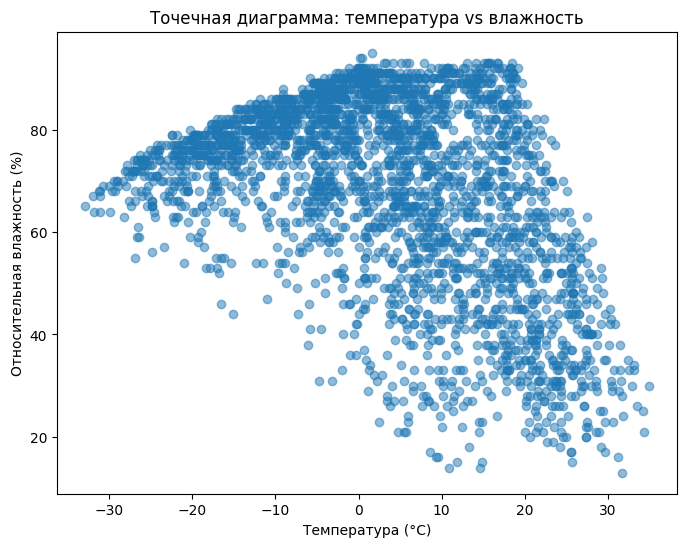

In [13]:
# 2. Точечная диаграмма для температуры и влажности
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['T'], df['U'], alpha=0.5)
plt.title('Точечная диаграмма: температура vs влажность')
plt.xlabel('Температура (°C)')
plt.ylabel('Относительная влажность (%)')
plt.show()

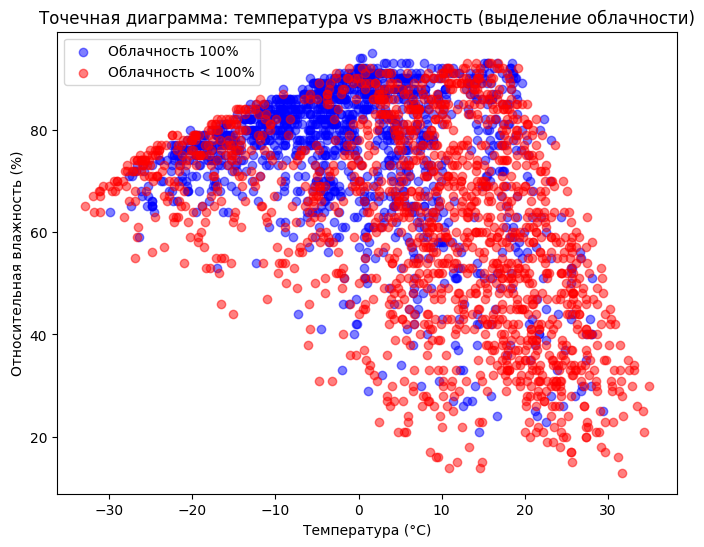

In [17]:
# Создаем маски для облачности
cloudy = df['N'] == '100%.'

plt.figure(figsize=(8, 6))
plt.scatter(df[cloudy]['T'], df[cloudy]['U'], color='blue', alpha=0.5, label='Облачность 100%')
plt.scatter(df[~cloudy]['T'], df[~cloudy]['U'], color='red', alpha=0.5, label='Облачность < 100%')

plt.title('Точечная диаграмма: температура vs влажность (выделение облачности)')
plt.xlabel('Температура (°C)')
plt.ylabel('Относительная влажность (%)')
plt.legend()
plt.show()


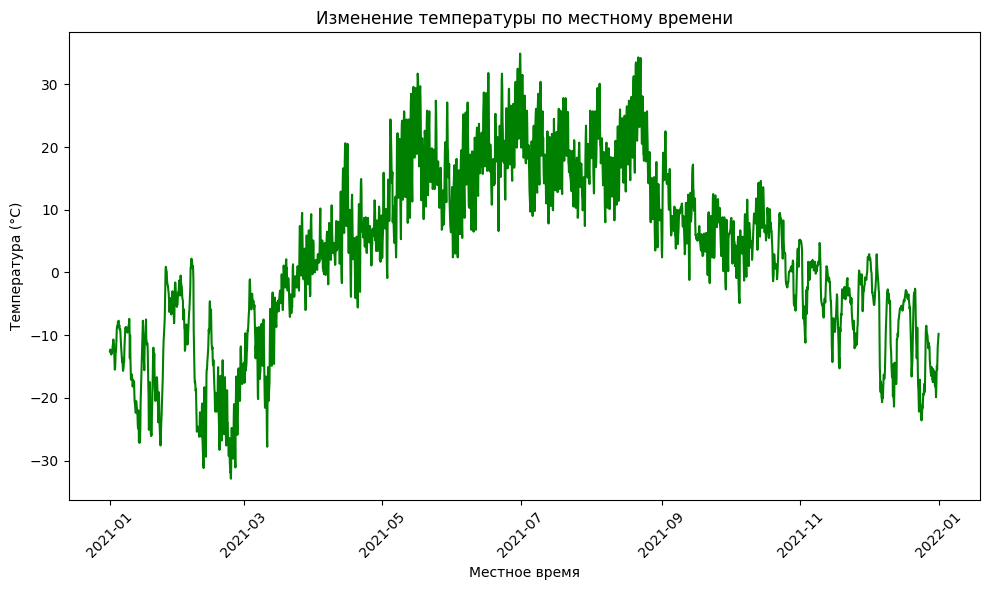

In [20]:
# Линейная диаграмма изменения температуры по времени
# Преобразуем время в формат datetime
df['Местное время в Перми'] = pd.to_datetime(df['Местное время в Перми'])

# Построение линейного графика
plt.figure(figsize=(10, 6))
plt.plot(df['Местное время в Перми'], df['T'], color='green')
plt.title('Изменение температуры по местному времени')
plt.xlabel('Местное время')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

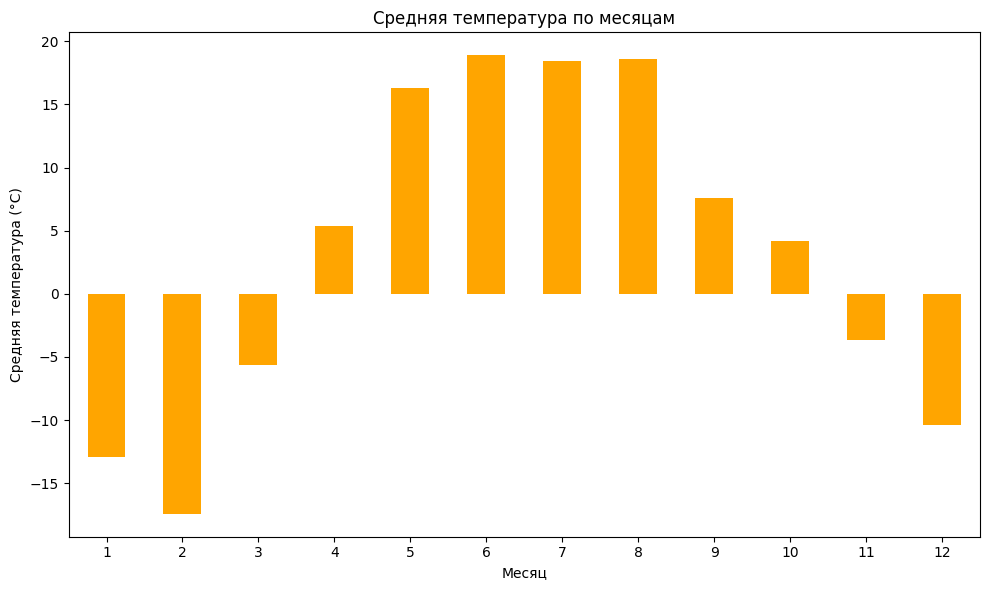

In [21]:
# 5.  (2 балла) Посчитайте по имеющимся данным среднемесячную температуру и 
# постройте  столбчатую  диаграмму  (вертикальную)  зависимости  средней 
# температуры от месяца. Подсказка: создайте отдельный столбец с номером месяца 
# (вычислив его из столбца «Местное время»),  а затем сгруппируйте данные по 
# этому столбцу.

# Извлекаем номер месяца
df['Месяц'] = df['Местное время в Перми'].dt.month

# Группируем по месяцам и находим среднее значение температуры
monthly_avg_temp = df.groupby('Месяц')['T'].mean()

# Построение столбчатой диаграммы
monthly_avg_temp.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Средняя температура по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средняя температура (°C)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# 6.  (1  балл)  Постройте  ленточную  диаграмму  (горизонтальную),  отразив  на  ней 
# количество имеющихся наблюдений для каждого варианта облачности.

/tmp/ipykernel_132466/197620714.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='N', data=df, palette='coolwarm')


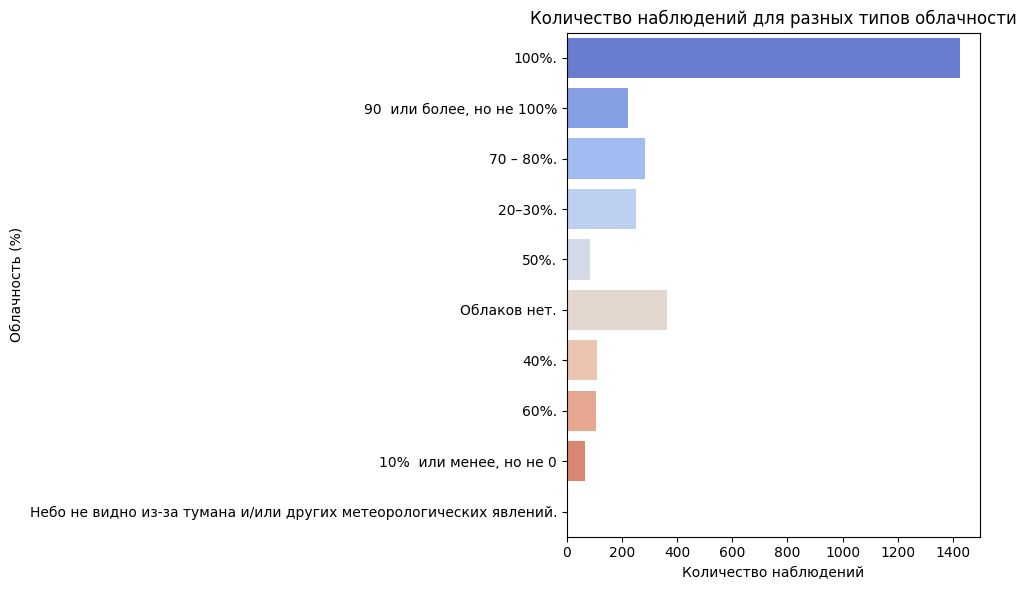

In [23]:
import seaborn as sns

# Построение ленточной диаграммы
plt.figure(figsize=(10, 6))
sns.countplot(y='N', data=df, palette='coolwarm')
plt.title('Количество наблюдений для разных типов облачности')
plt.xlabel('Количество наблюдений')
plt.ylabel('Облачность (%)')
plt.tight_layout()
plt.show()


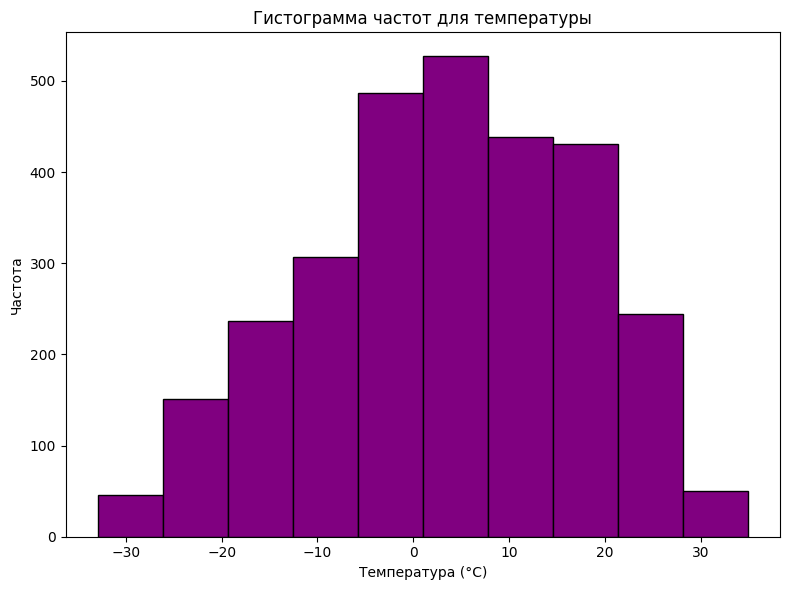

In [24]:
# 7.  (1 балл) Постройте гистограмму частот для температуры. На гистограмме должно 
# быть 10 диапазонов температуры. 

plt.figure(figsize=(8, 6))
plt.hist(df['T'], bins=10, color='purple', edgecolor='black')
plt.title('Гистограмма частот для температуры')
plt.xlabel('Температура (°C)')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()


/tmp/ipykernel_132466/390771289.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа VV', y='P', data=df, palette='Set2')


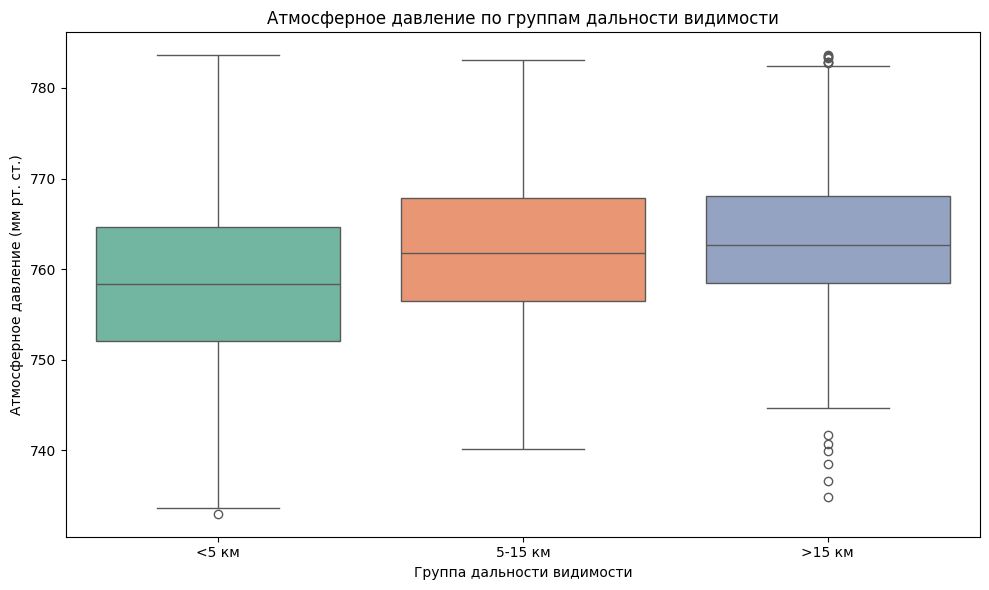

In [25]:
# 8.  (2 балла) Разбейте данные на 3 группы по значению горизонтальной дальности 
# видимости (одна группа –  дальность видимости менее 5 км, вторая –  от 5 до 
# 15 км(включительно), третья – более 15 км). В одной области для каждой группы 
# постройте  boxplot (диаграмму  «ящик  с  усами») для  признака  «атмосферное 
# давление».
# Создаем группы по дальности видимости
bins = [0, 5, 15, float('inf')]
labels = ['<5 км', '5-15 км', '>15 км']
df['Группа VV'] = pd.cut(df['VV'], bins=bins, labels=labels)

# Построение boxplot для атмосферного давления
plt.figure(figsize=(10, 6))
sns.boxplot(x='Группа VV', y='P', data=df, palette='Set2')
plt.title('Атмосферное давление по группам дальности видимости')
plt.xlabel('Группа дальности видимости')
plt.ylabel('Атмосферное давление (мм рт. ст.)')
plt.tight_layout()
plt.show()


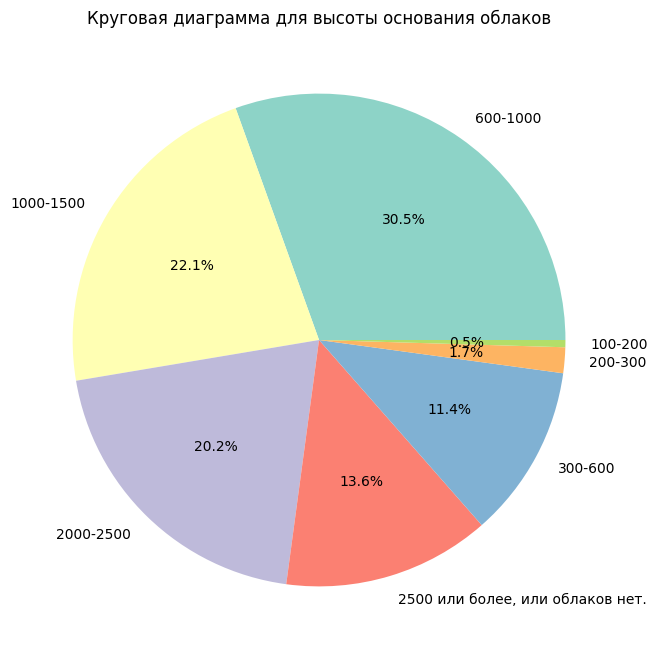

In [31]:
# 9. Круговая диаграмма для высоты основания облаков
# Группируем данные по высоте основания облаков
cloud_base_counts = df['H'].value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(10, 8))
plt.pie(cloud_base_counts, labels=cloud_base_counts.index, autopct='%1.1f%%', startangle=0, colors=sns.color_palette("Set3"))
plt.title('Круговая диаграмма для высоты основания облаков')
plt.show()
